In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'C:\Users\Tarang verma\Downloads\AI-Project-main\Data\HousePricePrediction.csv')

In [2]:
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [3]:
data.shape

(2919, 13)

In [4]:
# numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [5]:
numeric_cols

Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [6]:
categorical_cols

Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')

C:\Users\Tarang verma\AppData\Local\Temp\ipykernel_10432\4000692261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


Text(0.5, 1.0, 'Heatmap of Numerical Features')

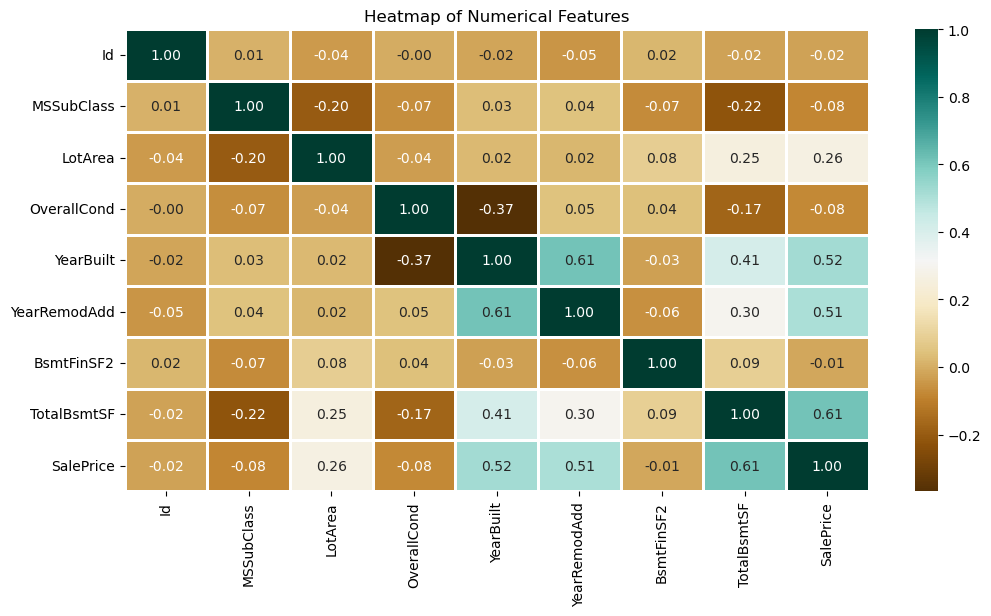

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)
plt.title('Heatmap of Numerical Features')

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

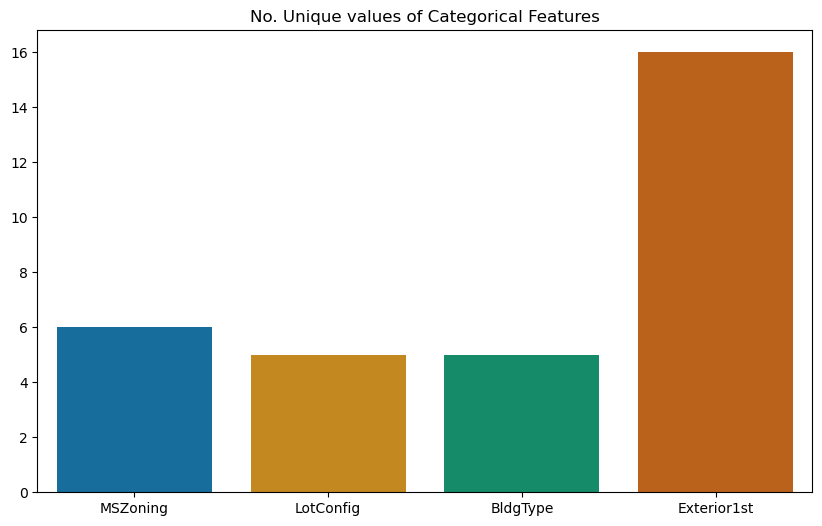

In [8]:
unique_values = []
for col in categorical_cols:
  unique_values.append(data[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
sns.barplot(x=categorical_cols,y=unique_values, palette='colorblind')

C:\Users\Tarang verma\AppData\Local\Temp\ipykernel_10432\1109776324.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 2, index)


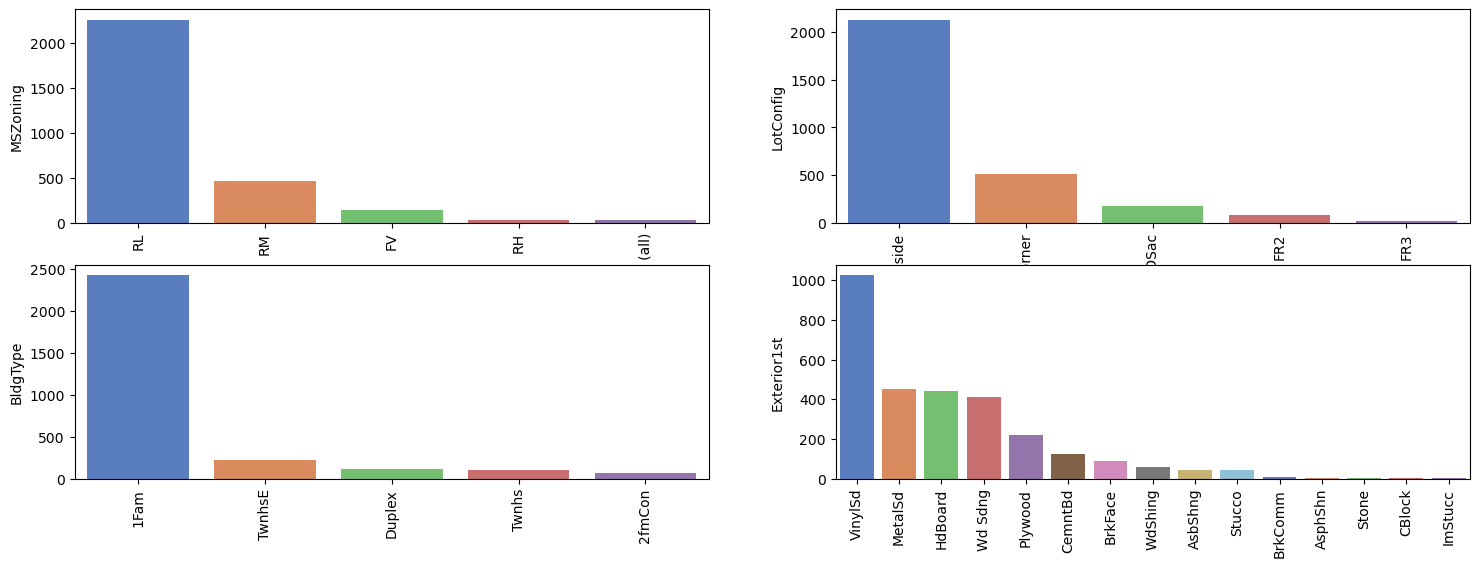

In [9]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in categorical_cols:
	y = data[col].value_counts()
	plt.subplot(11, 2, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y, palette='muted')
	index += 1

In [10]:
data.drop(['Id'], axis=1, inplace=True)

In [11]:
data.head(5)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [12]:
data.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [13]:
data['MSZoning'] = data['MSZoning'].fillna('NA')
data['Exterior1st'] = data['Exterior1st'].fillna('NA')

In [14]:
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean())
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())

In [15]:
data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['MSZoning'] = encoder.fit_transform(data['MSZoning'])
data['LotConfig'] = encoder.fit_transform(data['LotConfig'])
data['BldgType'] = encoder.fit_transform(data['BldgType'])
data['Exterior1st'] = encoder.fit_transform(data['Exterior1st'])

In [17]:
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,4,8450,4,0,5,2003,2003,13,0.0,856.0,208500.00000
1,20,4,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.00000
2,60,4,11250,4,0,5,2001,2002,13,0.0,920.0,223500.00000
3,70,4,9550,0,0,5,1915,1970,14,0.0,756.0,140000.00000
4,60,4,14260,2,0,5,2000,2000,13,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,5,1936,4,3,7,1970,1970,5,0.0,546.0,180921.19589
2915,160,5,1894,4,4,5,1970,1970,5,0.0,546.0,180921.19589
2916,20,4,20000,4,0,7,1960,1996,13,0.0,1224.0,180921.19589
2917,85,4,10441,4,0,5,1992,1992,6,0.0,912.0,180921.19589


In [18]:
from sklearn.model_selection import train_test_split

x = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

xtrain, xtest, ytrain, ytest = train_test_split(
	x, y, train_size=0.8, test_size=0.2, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(xtrain, ytrain)
Y_pred = rf.predict(xtest)

mape_rf = (mean_absolute_percentage_error(ytest, Y_pred))
mape_rf

0.19197280186755988

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
Y_pred = dt.predict(xtest)

mape_dt = (mean_absolute_percentage_error(ytest, Y_pred))
mape_dt

0.22921237125317573

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

gb = GradientBoostingRegressor()
gb.fit(xtrain, ytrain)
Y_pred = gb.predict(xtest)

mape_gb = (mean_absolute_percentage_error(ytest, Y_pred))
mape_gb

0.1917686321350308

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

knn = KNeighborsRegressor()
knn.fit(xtrain, ytrain)
Y_pred = knn.predict(xtest)

mape_knn = (mean_absolute_percentage_error(ytest, Y_pred))
mape_knn

0.20569241847368566

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

lr = LinearRegression()
lr.fit(xtrain, ytrain)
Y_pred = lr.predict(xtest)

mape_lr = (mean_absolute_percentage_error(ytest, Y_pred))
mape_lr

0.186332069185815

In [24]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(xtrain,ytrain)
Y_pred = model_SVR.predict(xtest)

mape_svr=(mean_absolute_percentage_error(ytest, Y_pred))
mape_svr

0.17706878227188572

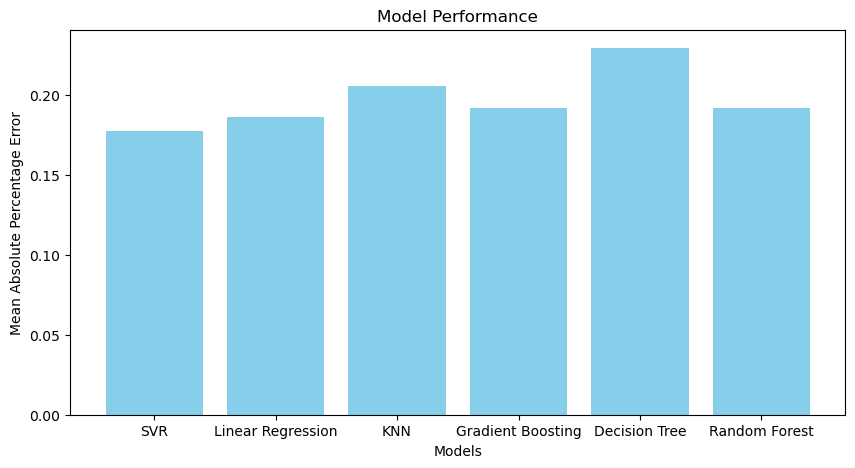

In [25]:
import matplotlib.pyplot as plt

# Assuming mape_values is a list of your MAPE values
mape_values = [mape_svr, mape_lr, mape_knn, mape_gb, mape_dt, mape_rf]

# Model names
models = ['SVR', 'Linear Regression', 'KNN', 'Gradient Boosting', 'Decision Tree', 'Random Forest']
color=['skyblue']
plt.figure(figsize=(10, 5))
plt.bar(models, mape_values, color=color)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Percentage Error')
plt.title('Model Performance')
plt.show()

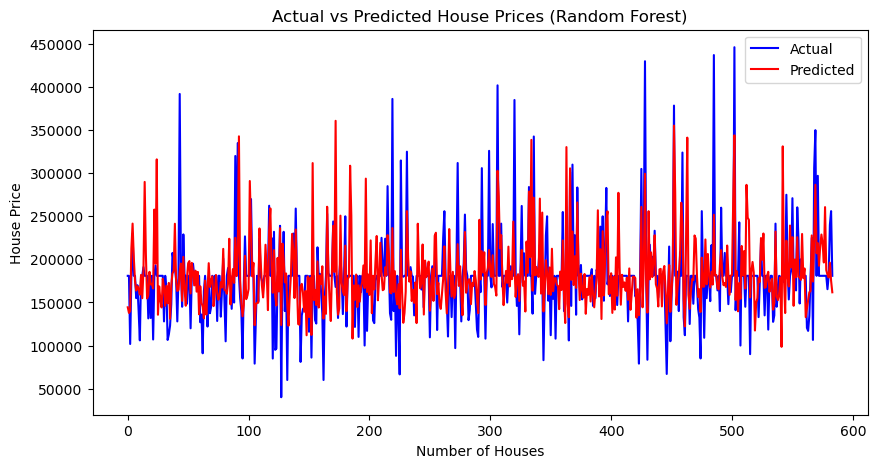

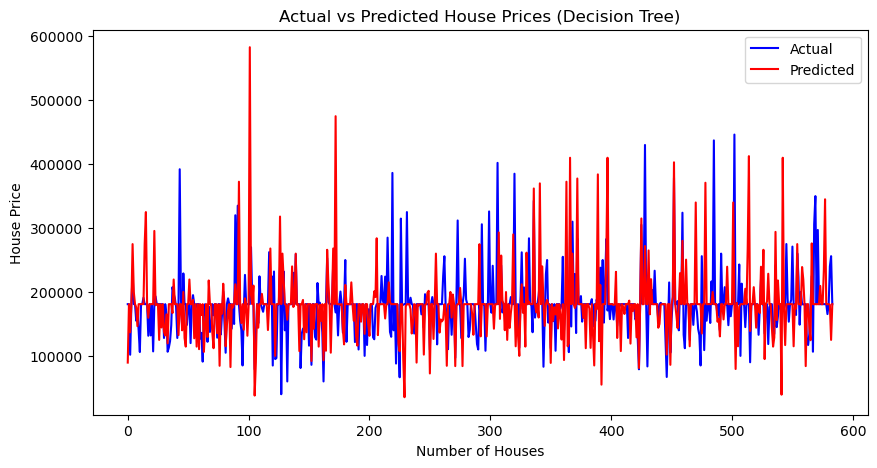

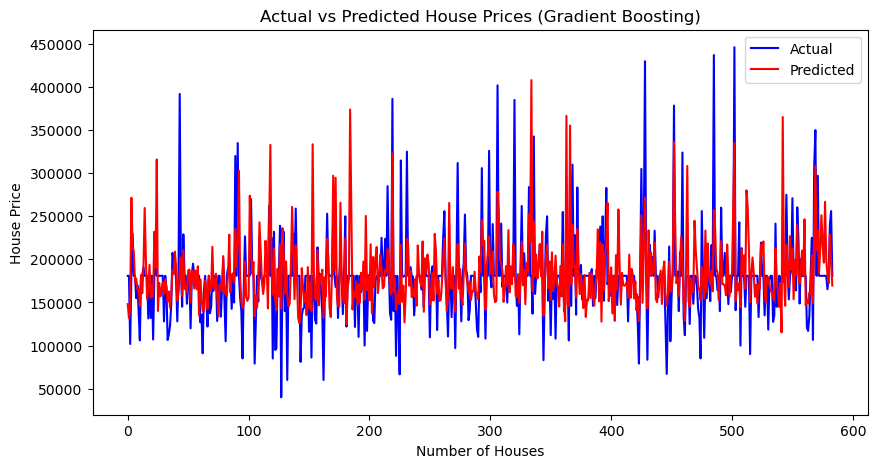

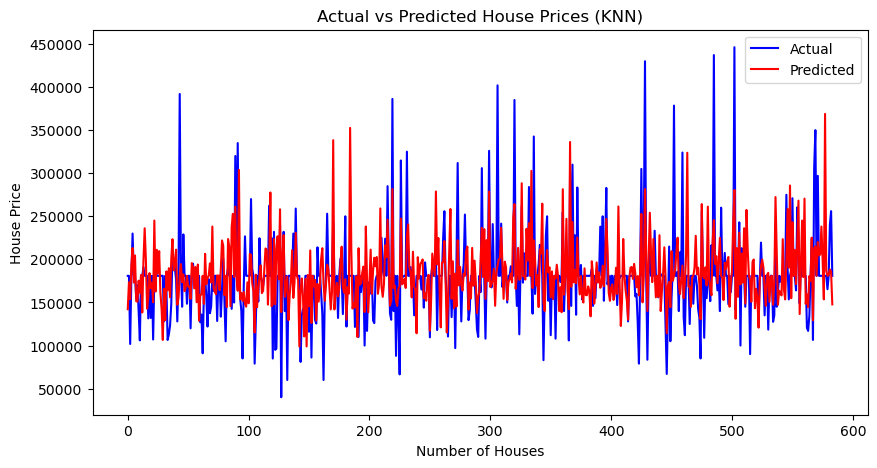

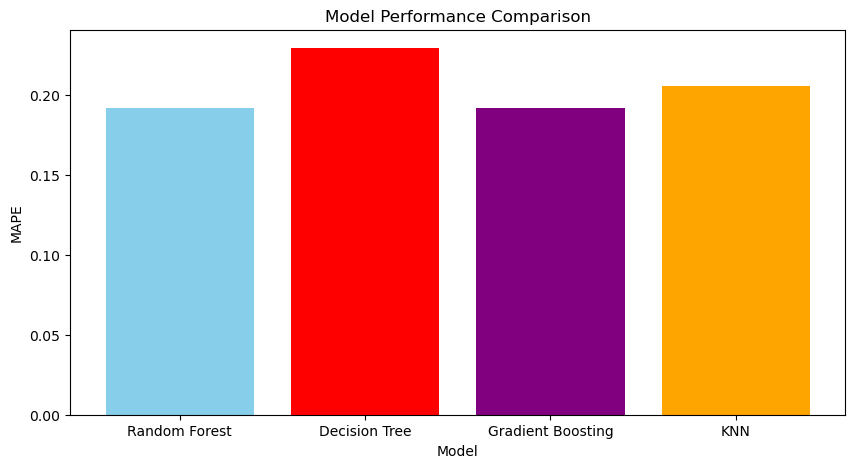

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Dictionary of models
models = {
    'Random Forest': rf,
    'Decision Tree': dt,
    'Gradient Boosting': gb,
    'KNN': knn,
}

# Dictionary of MAPE values
models_mape = {
    'Random Forest': mape_rf,
    'Decision Tree': mape_dt,
    'Gradient Boosting': mape_gb,
    'KNN': mape_knn,
}

# Create a line plot for each model
for model_name in models.keys():
    # Predict values
    model = models[model_name]
    Y_pred = model.predict(xtest)

    # Create a line plot
    plt.figure(figsize=(10, 5))
    plt.plot(ytest.values, label='Actual', color='blue')
    plt.plot(Y_pred, label='Predicted', color='red')
    plt.title(f'Actual vs Predicted House Prices ({model_name})')
    plt.xlabel('Number of Houses')
    plt.ylabel('House Price')
    plt.legend()
    plt.show()

colors = ['skyblue', 'red', 'purple', 'orange', 'yellow']

# Create a bar plot to compare MAPE values
plt.figure(figsize=(10, 5))
plt.bar(models_mape.keys(), models_mape.values(), color=colors)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.show()

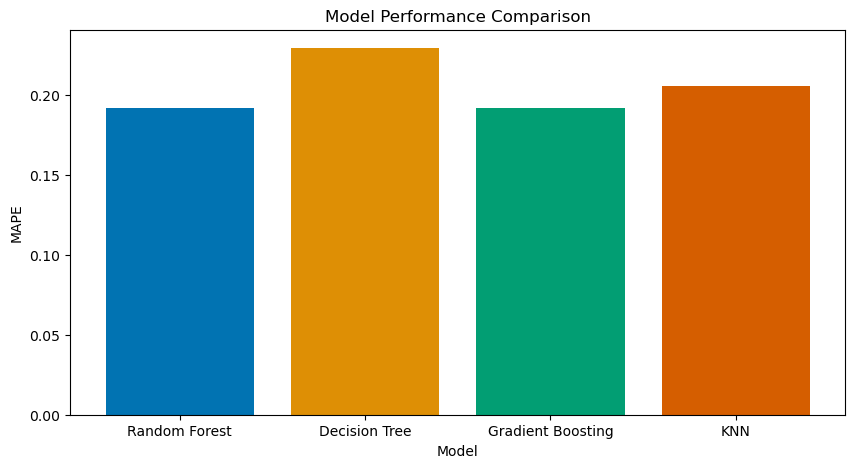

In [27]:
import seaborn as sns

# Create a bar plot to compare MAPE values
plt.figure(figsize=(10, 5))

# Get the 'colorblind' color palette from seaborn
colors = sns.color_palette('colorblind', len(models_mape))

plt.bar(models_mape.keys(), models_mape.values(), color=colors)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.show()